# Telecom Churn:
The business objective is to predict the churn With provided predictor variables and recommend strategies to manage customer churn based on the observations.

## Data Preparation 

In [1]:
# Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.utils import resample
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA, IncrementalPCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot,graphviz
from sklearn import metrics
from sklearn.svm import SVC
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

C:\Users\10688\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read the data from telecom_churn_data
churn = pd.read_csv('telecom_churn_data.csv')

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
churn.shape

(99999, 226)

In [7]:
#Finding the columns having only one value
single_val_col = [] 
for x in churn.columns:
    if (churn[x].nunique()==1):
        single_val_col.append(x)
single_val_col

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [8]:
#Drop the single valued columns
churn_new = churn.drop(single_val_col,axis=1)  

In [9]:
#Dataframe after removing the single valued columns
churn_new.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(168), int64(34), object(8)
memory usage: 160.2+ MB


In [10]:
#Finding null values in the columns
round(churn_new.isnull().sum()/len(churn_new.index),2).sort_values(ascending=False)[:41]

night_pck_user_6            0.75
fb_user_6                   0.75
arpu_2g_6                   0.75
date_of_last_rech_data_6    0.75
arpu_3g_6                   0.75
total_rech_data_6           0.75
max_rech_data_6             0.75
av_rech_amt_data_6          0.75
count_rech_2g_6             0.75
count_rech_3g_6             0.75
count_rech_3g_9             0.74
av_rech_amt_data_7          0.74
arpu_2g_7                   0.74
count_rech_2g_8             0.74
arpu_3g_9                   0.74
arpu_3g_8                   0.74
arpu_3g_7                   0.74
count_rech_2g_9             0.74
date_of_last_rech_data_9    0.74
count_rech_3g_7             0.74
total_rech_data_7           0.74
total_rech_data_8           0.74
total_rech_data_9           0.74
count_rech_3g_8             0.74
arpu_2g_8                   0.74
max_rech_data_8             0.74
av_rech_amt_data_9          0.74
av_rech_amt_data_8          0.74
max_rech_data_7             0.74
max_rech_data_9             0.74
arpu_2g_9 

In [11]:
#Columns having more than 70% null values
null_columns = (churn_new.isnull().sum()/len(churn_new.index)).sort_values(ascending=False)[:40].index
null_columns = sorted(null_columns)
np.array(null_columns)

array(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'fb_user_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9'], dtype='<U24')

In [12]:
#Impute the some important numeric columns with 0

col_impu_0 = ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6',
              'total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7',
              'max_rech_data_8','max_rech_data_9','date_of_last_rech_data_6','date_of_last_rech_data_7',
              'date_of_last_rech_data_8','date_of_last_rech_data_9','date_of_last_rech_6','date_of_last_rech_7',
              'date_of_last_rech_8','date_of_last_rech_9']
for x in col_impu_0:
    churn_new.loc[churn_new[x].isnull(),x]=0

In [13]:
#Impute the some categorical columns with -1

col_impu_1 = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
              'fb_user_8','fb_user_9']
for x in col_impu_1:
    churn_new.loc[churn_new[x].isnull(),x]=-1;
churn_new[col_impu_1] = churn_new[col_impu_1].astype('object')
churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 210 entries, mobile_number to sep_vbc_3g
dtypes: float64(160), int64(34), object(16)
memory usage: 160.2+ MB


In [14]:
#Finding the remaining columns in 70% null value columns
null_columns = np.setdiff1d(null_columns,col_impu_0)
null_columns = np.setdiff1d(null_columns,col_impu_1)
null_columns

array(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9'], dtype='<U24')

In [15]:
#Drop the remaining columns
churn_new = churn_new.drop(null_columns,axis=1)
churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 194 entries, mobile_number to sep_vbc_3g
dtypes: float64(144), int64(34), object(16)
memory usage: 148.0+ MB


In [16]:
#find again null value columns
round(churn_new.isnull().sum()/len(churn_new.index),2).sort_values(ascending=False)[:50]

std_ic_t2m_mou_9    0.08
std_ic_mou_9        0.08
loc_og_t2t_mou_9    0.08
loc_og_t2m_mou_9    0.08
loc_ic_t2t_mou_9    0.08
loc_og_t2f_mou_9    0.08
std_ic_t2f_mou_9    0.08
loc_og_mou_9        0.08
std_og_t2t_mou_9    0.08
std_og_t2m_mou_9    0.08
roam_og_mou_9       0.08
std_og_t2f_mou_9    0.08
std_og_mou_9        0.08
isd_og_mou_9        0.08
spl_ic_mou_9        0.08
spl_og_mou_9        0.08
og_others_9         0.08
isd_ic_mou_9        0.08
std_ic_t2t_mou_9    0.08
loc_og_t2c_mou_9    0.08
ic_others_9         0.08
loc_ic_t2f_mou_9    0.08
offnet_mou_9        0.08
loc_ic_t2m_mou_9    0.08
roam_ic_mou_9       0.08
onnet_mou_9         0.08
loc_ic_mou_9        0.08
std_og_t2m_mou_8    0.05
loc_ic_t2t_mou_8    0.05
std_og_t2f_mou_8    0.05
onnet_mou_8         0.05
std_og_mou_8        0.05
spl_ic_mou_8        0.05
std_og_t2t_mou_8    0.05
isd_og_mou_8        0.05
loc_ic_t2f_mou_8    0.05
spl_og_mou_8        0.05
isd_ic_mou_8        0.05
og_others_8         0.05
loc_ic_t2m_mou_8    0.05


In [17]:
#Imputing all the numeric columns with median those having less than 10% of null values  
des_col = churn_new.describe().columns
for x in des_col:
    churn_new.loc[churn_new[x].isnull(),x]=churn_new[x].median()

In [18]:
#Changing type of the variable from object to datetime

churn_new[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']] = churn_new[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].apply(pd.to_datetime, errors='coerce')
churn_new[['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']] = churn_new[['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']].apply(pd.to_datetime, errors='coerce')

In [19]:
churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 194 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(178), object(8)
memory usage: 148.0+ MB


In [20]:
#Checking if is there any null values any
round(churn_new.isnull().sum()/len(churn_new.index),2).sort_values(ascending=False).head()

sep_vbc_3g          0.0
std_og_t2m_mou_9    0.0
total_og_mou_7      0.0
total_og_mou_6      0.0
og_others_9         0.0
dtype: float64

All important data quality checks are performed and inconsistent/missing data is handled appropriately.

### Hence data cleaning is finished 

## EDA

In [21]:
#Filtering only 6th month columns to understand the data
col_6 = churn_new.columns[churn_new.columns.str.contains('_6')]

In [22]:
churn_new[col_6[30:39]].head(10)

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,4.0,362.0,252.0,2014-06-21,252.0,2014-06-21,1.0,252.0,252.0
1,4.0,74.0,44.0,2014-06-29,44.0,1970-01-01,0.0,0.0,0.0
2,5.0,168.0,86.0,2014-06-17,0.0,1970-01-01,0.0,0.0,0.0
3,10.0,230.0,60.0,2014-06-28,30.0,1970-01-01,0.0,0.0,0.0
4,5.0,196.0,56.0,2014-06-26,50.0,2014-06-04,1.0,56.0,56.0
5,2.0,120.0,120.0,2014-06-19,120.0,1970-01-01,0.0,0.0,0.0
6,15.0,499.0,90.0,2014-06-28,37.0,1970-01-01,0.0,0.0,0.0
7,5.0,1580.0,1580.0,2014-06-27,0.0,1970-01-01,0.0,0.0,0.0
8,19.0,437.0,90.0,2014-06-25,50.0,1970-01-01,0.0,0.0,0.0
9,4.0,220.0,110.0,2014-06-29,110.0,1970-01-01,0.0,0.0,0.0


In [23]:
churn_new[col_6[39:]].head(10)

,vol_2g_mb_6,vol_3g_mb_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,30.13,83.57,0,0.0,0.0,1.0,0.0,1
1,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
2,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
3,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
4,0.00,0.00,0,0.0,1.0,0.0,0.0,0
5,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
6,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
7,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
8,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1
9,0.00,0.00,-1,0.0,0.0,0.0,0.0,-1


In [24]:
#Analysing columns to get high value customers
churn_new[['total_rech_data_6','max_rech_data_6','av_rech_amt_data_6']].sort_values(by='max_rech_data_6',
                                                                                    ascending=False).head(20)

,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
65258,3.0,1555.0,2759.0
12445,5.0,1555.0,1457.0
46998,2.0,1555.0,3110.0
67754,1.0,1555.0,1555.0
11530,1.0,1555.0,1555.0
80216,1.0,1555.0,1555.0
27531,4.0,1555.0,5920.0
81699,1.0,1555.0,1555.0
36883,1.0,1555.0,1555.0
13254,2.0,1505.0,1954.0


In [25]:
#Defined a common function to generate boxplots for set of columns 
def EDA_plots_monthwise(columns_array):
    plt.figure(figsize=(20,12))
    num = 1
    for col in columns_array:
        plt.subplot(2,5,num)
        sns.boxplot(y=churn_new[col])
        plt.yscale('log')
        plt.title(col + " distribution")
        num = num+1
    plt.show()

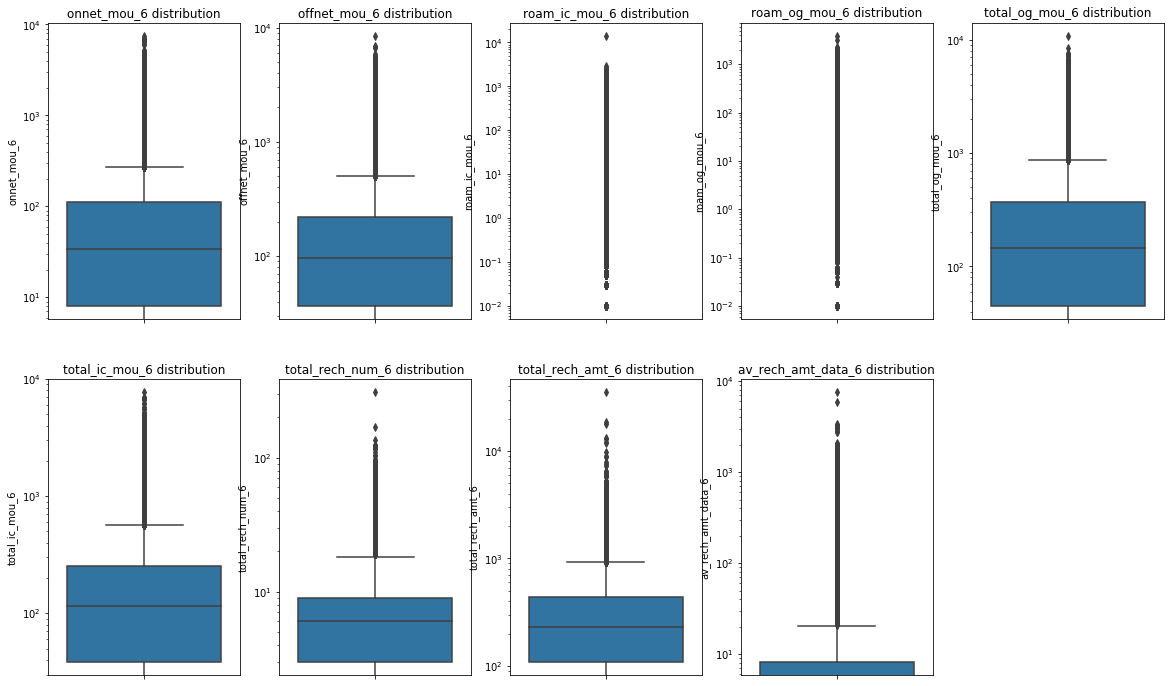

In [26]:
#Univariate Analysis for 6th month features 
EDA_columns_6 = ['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'total_og_mou_6', 'total_ic_mou_6', 'total_rech_num_6', 'total_rech_amt_6', 'av_rech_amt_data_6']
EDA_plots_monthwise(EDA_columns_6)    

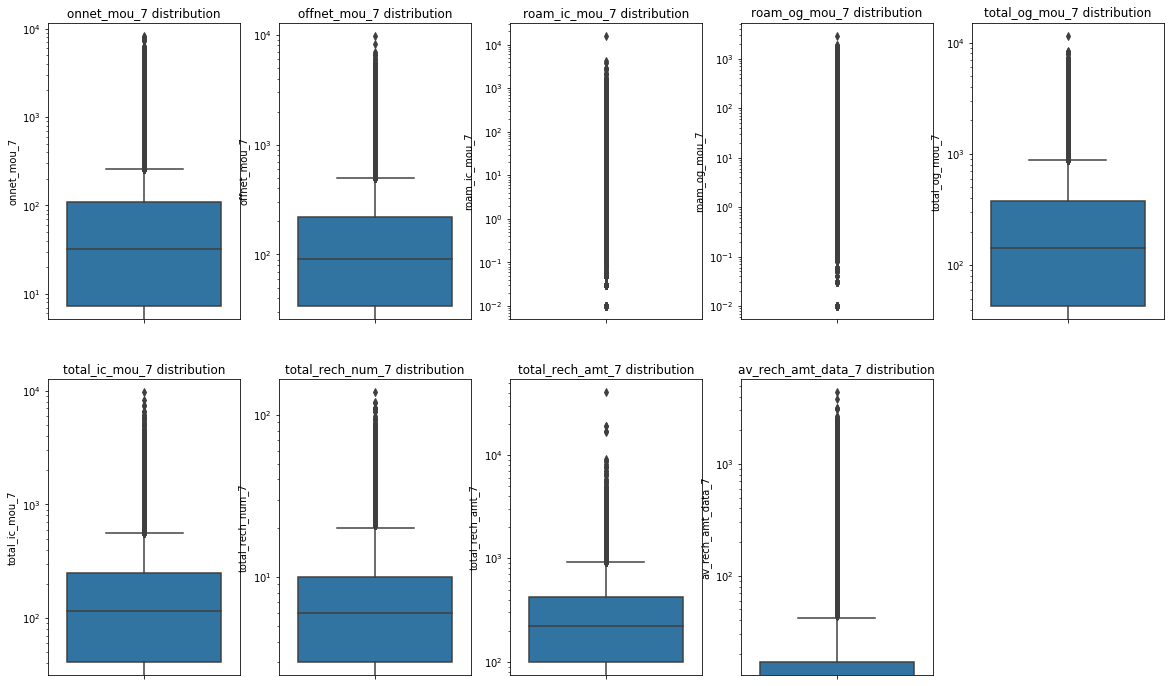

In [27]:
#Univariate Analysis for 7th month features 
EDA_columns_7 = ['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'total_og_mou_7', 'total_ic_mou_7', 'total_rech_num_7', 'total_rech_amt_7', 'av_rech_amt_data_7']
EDA_plots_monthwise(EDA_columns_7)

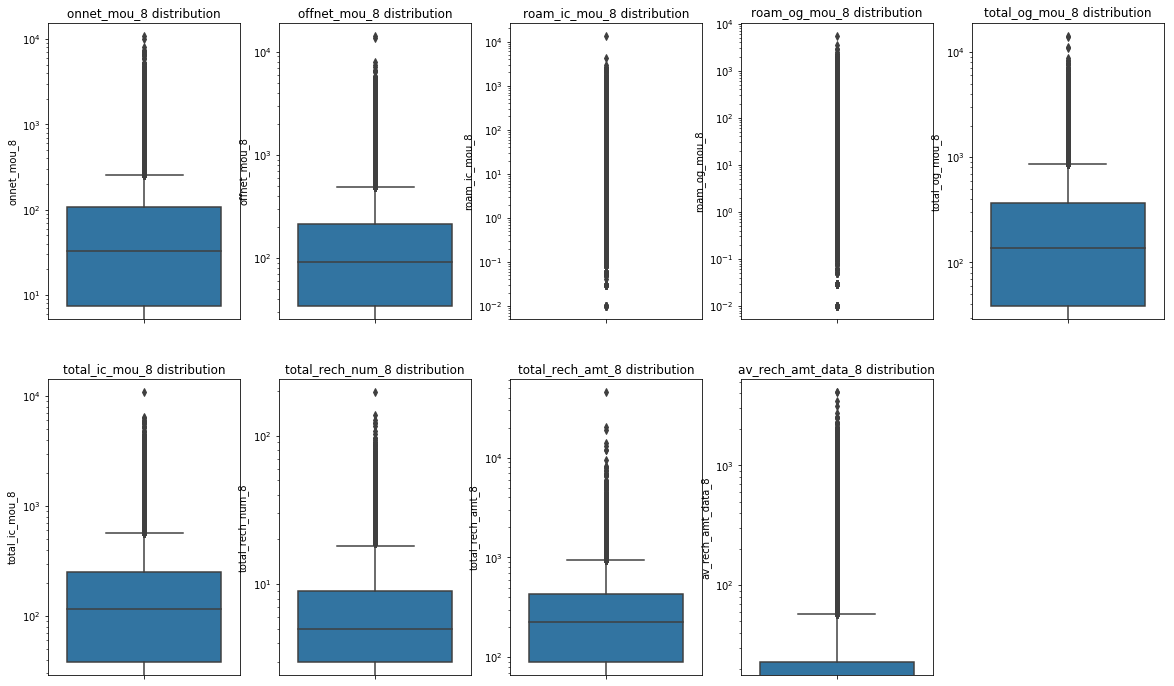

In [28]:
#Univariate Analysis for 8th month features 
EDA_columns_8 = ['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'av_rech_amt_data_8']
EDA_plots_monthwise(EDA_columns_8)

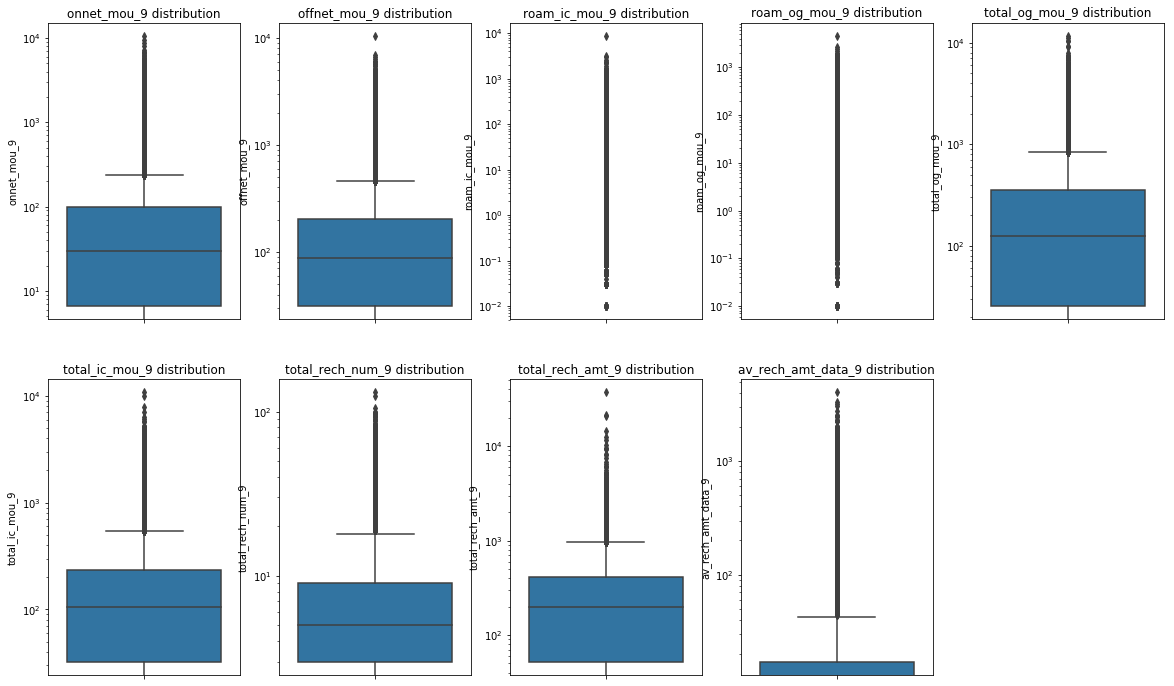

In [29]:
#Univariate Analysis for 9th month features 
EDA_columns_9 = ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'total_og_mou_9', 'total_ic_mou_9', 'total_rech_num_9', 'total_rech_amt_9', 'av_rech_amt_data_9']
EDA_plots_monthwise(EDA_columns_9)

In [30]:
#Finding all the amount coloumns 
total_amt = churn_new.columns[churn_new.columns.str.contains('amt')]
total_amt

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

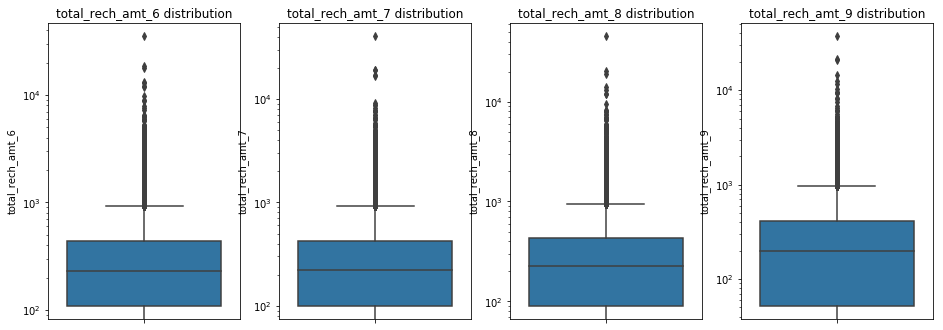

In [31]:
#Univariate Analysis for total amount related features 
EDA_amt_total = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']
EDA_plots_monthwise(EDA_amt_total)

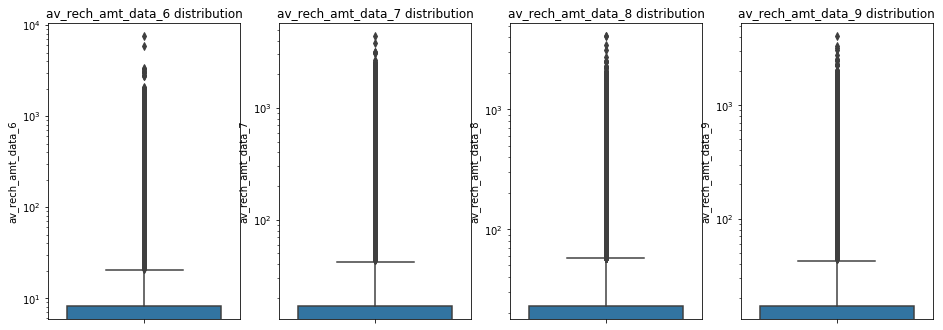

In [32]:
#Univariate Analysis for average amount related features 
EDA_amt_avg = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
EDA_plots_monthwise(EDA_amt_avg)

In [33]:
#Finding correlated columns 
churn_corr = churn_new.corr().rename_axis(None).rename_axis(None, axis=1)
churn_corr_max = churn_corr[(churn_corr > 0.9) & (churn_corr != 1)]
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                #colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add((corr_matrix.columns[i], corr_matrix.columns[j]))

    return col_corr
    
colss = correlation(churn_new, 0.9)
print(len(colss))
colss

11


{('isd_og_mou_7', 'isd_og_mou_6'),
 ('isd_og_mou_8', 'isd_og_mou_6'),
 ('isd_og_mou_8', 'isd_og_mou_7'),
 ('sachet_2g_6', 'total_rech_data_6'),
 ('sachet_2g_7', 'total_rech_data_7'),
 ('sachet_2g_8', 'total_rech_data_8'),
 ('total_ic_mou_6', 'loc_ic_mou_6'),
 ('total_rech_amt_6', 'arpu_6'),
 ('total_rech_amt_7', 'arpu_7'),
 ('total_rech_amt_8', 'arpu_8'),
 ('total_rech_amt_9', 'arpu_9')}

## Derived Metrics

In [34]:
#total_og_mou_6,total_ic_mou_6,total_rech_amt_6,av_rech_amt_data_6
#Derived metrics

#Good Phase average variables
churn_new['avg_og_mou_6&7'] = (churn_new['total_og_mou_6']+churn_new['total_og_mou_7'])/2
churn_new['avg_ic_mou_6&7'] = (churn_new['total_ic_mou_6']+churn_new['total_ic_mou_7'])/2
churn_new['av_rech_amt_data_6&7'] = (churn_new['av_rech_amt_data_6']+churn_new['av_rech_amt_data_7'])/2
churn_new['avg_vol_2g_mb_6&7'] = (churn_new['vol_2g_mb_6']+churn_new['vol_2g_mb_7'])/2
churn_new['avg_vol_3g_mb_6&7'] = (churn_new['vol_3g_mb_6']+churn_new['vol_3g_mb_7'])/2
churn_new['avg_data_6&7'] = (churn_new['vol_3g_mb_6']+churn_new['vol_3g_mb_7']+
                               churn_new['vol_2g_mb_6']+churn_new['vol_2g_mb_7'])/2


#Difference b/w good phase months(i.e 6 and 7)
churn_new['diff_og_mou_6&7'] = (churn_new['total_og_mou_6']-churn_new['total_og_mou_7'])
churn_new['diff_ic_mou_6&7'] = (churn_new['total_ic_mou_6']-churn_new['total_ic_mou_7'])
churn_new['diff_rech_amt_data_6&7'] = (churn_new['av_rech_amt_data_6']-churn_new['av_rech_amt_data_7'])
churn_new['diff_rech_6&7'] = (churn_new['total_rech_amt_6']-churn_new['total_rech_amt_7']+
                             churn_new['av_rech_amt_data_6']-churn_new['av_rech_amt_data_7'])
churn_new['diff_vol_2g_mb_6&7'] = (churn_new['vol_2g_mb_6']-churn_new['vol_2g_mb_7'])
churn_new['dif_vol_3g_mb_6&7'] = (churn_new['vol_3g_mb_6']-churn_new['vol_3g_mb_7'])
churn_new['diff_data_6&7'] = (churn_new['vol_3g_mb_6']-churn_new['vol_3g_mb_7']+
                               churn_new['vol_2g_mb_6']-churn_new['vol_2g_mb_7'])

#Difference b/w good phase and bad phase
churn_new['diff_og_mou_7&8'] = (churn_new['avg_og_mou_6&7']-churn_new['total_og_mou_8'])
churn_new['diff_ic_mou_7&8'] = (churn_new['avg_ic_mou_6&7']-churn_new['total_ic_mou_8'])
churn_new['diff_rech_amt_data_7&8'] = (churn_new['av_rech_amt_data_6&7']-churn_new['av_rech_amt_data_8'])
churn_new['diff_rech_7&8'] = (churn_new['total_rech_amt_7']+churn_new['total_rech_amt_6']-2*churn_new['total_rech_amt_8']+
                             churn_new['av_rech_amt_data_7']+churn_new['av_rech_amt_data_6']-2*churn_new['av_rech_amt_data_8'])/2
churn_new['diff_vol_2g_mb_7&8'] = (churn_new['avg_vol_2g_mb_6&7']-churn_new['vol_2g_mb_8'])
churn_new['dif_vol_3g_mb_7&8'] = (churn_new['avg_vol_3g_mb_6&7']-churn_new['vol_3g_mb_8'])
churn_new['diff_data_7&8'] = (churn_new['avg_data_6&7']-churn_new['vol_3g_mb_8']-churn_new['vol_2g_mb_7'])

#Bad Phase total variables
churn_new['avg_rech_8'] = (churn_new['total_rech_amt_8']+churn_new['av_rech_amt_data_7'])
churn_new['total_data_8'] = (churn_new['vol_2g_mb_8']+churn_new['vol_3g_mb_8'])

## Filtering high-value customers

In [35]:
churn_new['avg_rech_6&7'] = (churn_new['total_rech_amt_6']+churn_new['total_rech_amt_7']+
                             churn_new['av_rech_amt_data_6']+churn_new['av_rech_amt_data_7'])/2

churn_new['avg_rech_6&7'].describe(percentiles=[0.7])

count    99999.000000
mean       375.158217
std        422.446506
min          0.000000
50%        263.500000
70%        431.000000
max      37762.500000
Name: avg_rech_6&7, dtype: float64

In [36]:
high_val_cost = churn_new[churn_new['avg_rech_6&7']>=431]
high_val_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Columns: 217 entries, mobile_number to avg_rech_6&7
dtypes: datetime64[ns](8), float64(201), object(8)
memory usage: 49.9+ MB


## Tagging churned customers

In [37]:
#total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
high_val_cost['churn_mou']  = (high_val_cost['total_ic_mou_9']+high_val_cost['total_og_mou_9'])
high_val_cost['churn_data'] =  (high_val_cost['vol_2g_mb_9']+high_val_cost['vol_3g_mb_9'])

In [38]:
high_val_cost['churn'] = (high_val_cost['churn_mou']>0) | (high_val_cost['churn_data']>0)

In [39]:
high_val_cost[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,False
7,0.00,0.00,0.00,0.00,False
8,34.91,142.18,0.00,0.00,True
16,334.56,255.74,0.00,0.00,True
21,252.61,1031.53,0.00,0.00,True
33,114.16,1.70,30.92,5588.11,True
38,114.09,708.04,0.00,0.00,True
41,165.84,89.13,0.00,0.00,True
48,894.81,2319.01,0.00,0.00,True
53,680.61,503.06,0.82,0.00,True


In [40]:
high_val_cost['churn'] = high_val_cost['churn'].apply(lambda x: 0 if (x==True) else 1) #Tag the churn as 1 else 0

In [41]:
#Checking the tag is correct or not
high_val_cost[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head() 

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.0,0.0,1
7,0.00,0.00,0.0,0.0,1
8,34.91,142.18,0.0,0.0,0
16,334.56,255.74,0.0,0.0,0
21,252.61,1031.53,0.0,0.0,0


In [42]:
high_val_cost.churn.sum()  # total no of churn in the high value customers

2460

In [43]:
high_val_cost.churn.count()  # total no of churn in the high value customers

30015

#### Churn Customers count: 2460
#### Non Churn Customers count: 27555

In [44]:
#Removing the churn month columns
high_val_cost = high_val_cost.drop(['churn_mou','churn_data'] ,axis=1)
col_9th = churn_new.columns[churn_new.columns.str.contains('_9')]
high_val_cost = high_val_cost.drop(col_9th,axis=1)  

In [45]:
high_val_cost.info()  #Dataframe after dropping churn month columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Columns: 171 entries, mobile_number to churn
dtypes: datetime64[ns](6), float64(158), int64(1), object(6)
memory usage: 39.4+ MB


In [46]:
#Finding years which are present
for x in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']:
    x = churn_new[x].apply(lambda a:a.year if a != 0 else 0)
    print (x.value_counts())

2014    98392
1970     1607
Name: date_of_last_rech_6, dtype: int64
2014    98232
1970     1767
Name: date_of_last_rech_7, dtype: int64
2014    96377
1970     3622
Name: date_of_last_rech_8, dtype: int64


In [47]:
#Removing 1970 data which are very lesss
high_val_cost = high_val_cost[high_val_cost['date_of_last_rech_6'].apply(lambda a:a.year if a != 0 else 0)!=1970]

In [48]:
for x in ['date_of_last_rech_6','date_of_last_rech_6','date_of_last_rech_6']:
    x = high_val_cost[x].apply(lambda a:a.year if a != 0 else 0)
    print (x.value_counts())

2014    29954
Name: date_of_last_rech_6, dtype: int64
2014    29954
Name: date_of_last_rech_6, dtype: int64
2014    29954
Name: date_of_last_rech_6, dtype: int64


In [49]:
# Creating individual columns date,month,year for all the date_of_last_rech_data columns
high_val_cost['day_of_last_rech_data_6'] = high_val_cost['date_of_last_rech_data_6'].apply(lambda x: x.day if x !=0 else 0).astype(int)
high_val_cost['day_of_last_rech_data_7'] = high_val_cost['date_of_last_rech_data_7'].apply(lambda x: x.day if x !=0 else 0).astype(int)
high_val_cost['day_of_last_rech_data_8'] = high_val_cost['date_of_last_rech_data_8'].apply(lambda x: x.day if x !=0 else 0).astype(int)

In [50]:
# Creating individual columns date,month,year for all the date_of_last_rech columns
high_val_cost['day_of_last_rech_6'] = high_val_cost['date_of_last_rech_6'].apply(lambda x: x.day if x !=0 else 0).astype(int)
high_val_cost['day_of_last_rech_7'] = high_val_cost['date_of_last_rech_7'].apply(lambda x: x.day if x !=0 else 0).astype(int)
high_val_cost['day_of_last_rech_8'] = high_val_cost['date_of_last_rech_8'].apply(lambda x: x.day if x !=0 else 0).astype(int)

In [51]:
#Dropping date_of_last_rech_data columns
high_val_cost.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)
high_val_cost.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [52]:
high_val_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29954 entries, 0 to 99998
Columns: 171 entries, mobile_number to day_of_last_rech_8
dtypes: float64(158), int32(6), int64(1), object(6)
memory usage: 38.6+ MB


## EDA on High Valued Customers

In [53]:
#Finding important columns to do EDA
high_val_cost.columns[high_val_cost.columns.str.contains('_6')]

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'night_pck_user_6',
       'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6',
       'fb_user_6', 'avg_og_mou_6&7', 'avg_ic_mou_6&7', 'av_rech_amt_data_6&7',
       'avg_vol_2g_mb_6&7', 'avg_vol_3g_mb_6&7

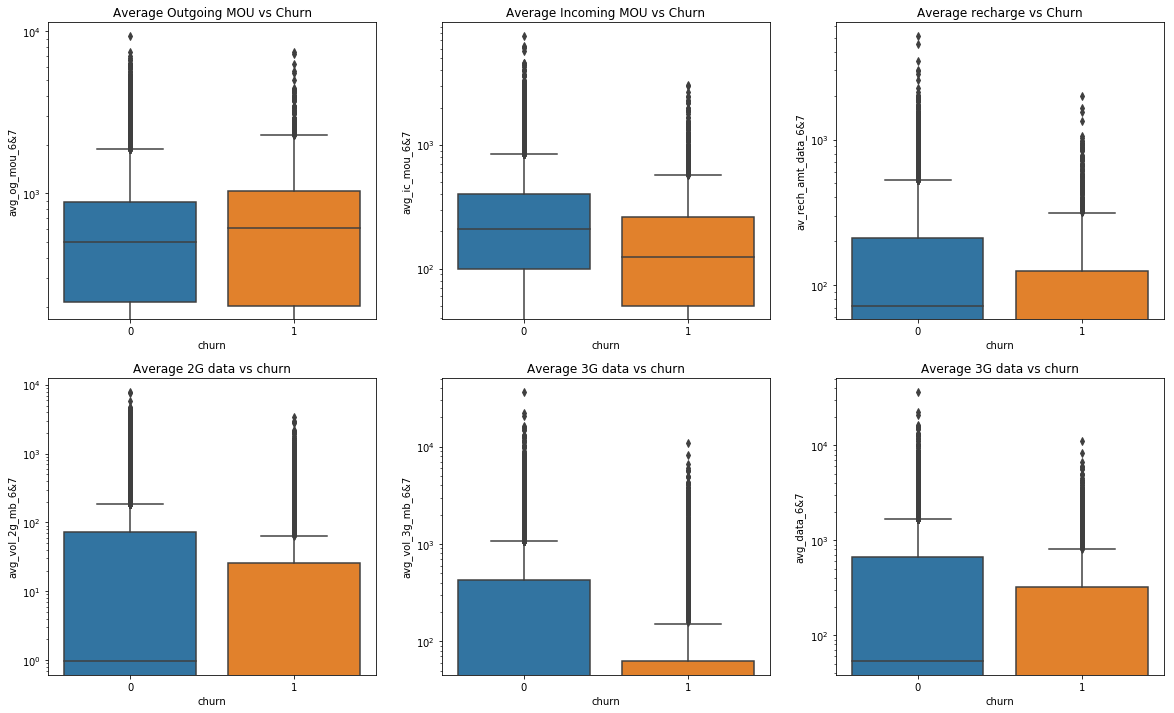

In [54]:
#Good Phase Plots
plt.figure(1,figsize=(20,12))
plt.subplot(231)
sns.boxplot(y='avg_og_mou_6&7',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average Outgoing MOU vs Churn')
plt.subplot(232)
sns.boxplot(y='avg_ic_mou_6&7',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average Incoming MOU vs Churn')
plt.subplot(233)
sns.boxplot(y='av_rech_amt_data_6&7',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average recharge vs Churn')
plt.subplot(234)
sns.boxplot(y='avg_vol_2g_mb_6&7',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average 2G data vs churn')
plt.subplot(235)
sns.boxplot(y='avg_vol_3g_mb_6&7',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average 3G data vs churn')
plt.subplot(236)
sns.boxplot(y='avg_data_6&7',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average 3G data vs churn')
plt.show()

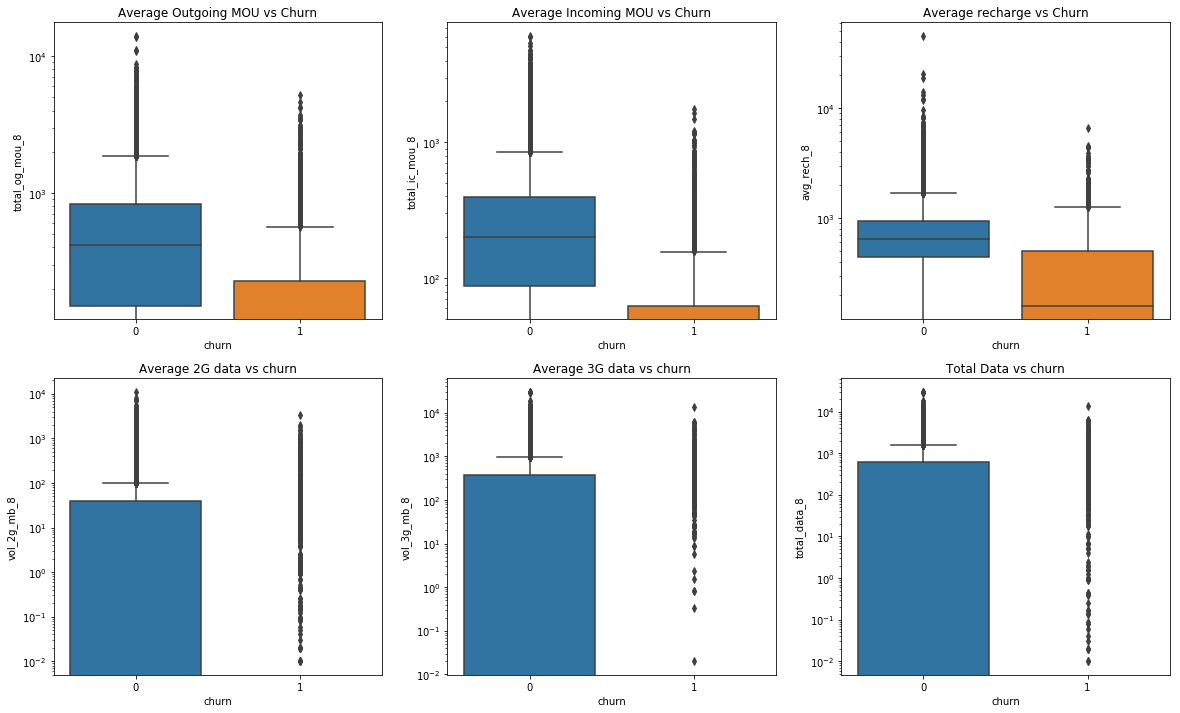

In [55]:
#Bad Phase Plots
plt.figure(1,figsize=(20,12))
plt.subplot(231)
sns.boxplot(y='total_og_mou_8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average Outgoing MOU vs Churn')
plt.subplot(232)
sns.boxplot(y='total_ic_mou_8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average Incoming MOU vs Churn')
plt.subplot(233)
sns.boxplot(y='avg_rech_8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average recharge vs Churn')
plt.subplot(234)
sns.boxplot(y=high_val_cost['vol_2g_mb_8'],x=high_val_cost['churn'])
plt.yscale('log')
plt.title('Average 2G data vs churn')
plt.subplot(235)
sns.boxplot(y=high_val_cost['vol_3g_mb_8'],x=high_val_cost['churn'])
plt.yscale('log')
plt.title('Average 3G data vs churn')
plt.subplot(236)
sns.boxplot(y=high_val_cost['total_data_8'],x=high_val_cost['churn'])
plt.yscale('log')
plt.title('Total Data vs churn')
plt.show()

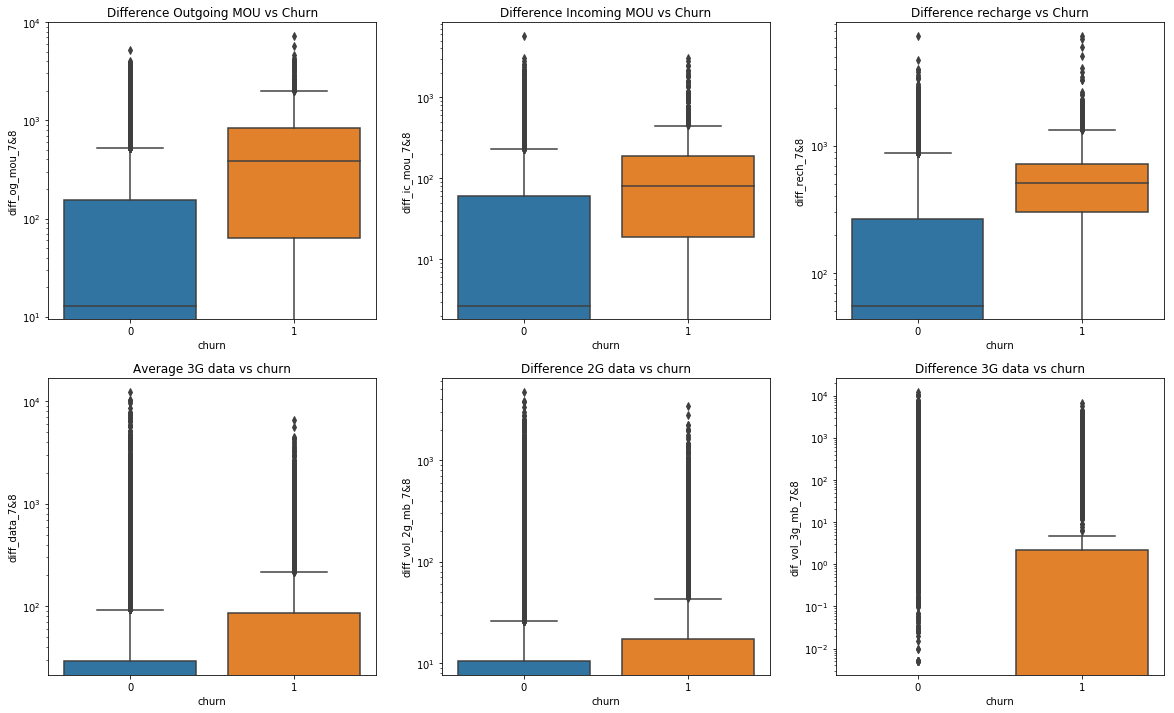

In [56]:
#Difference between good and bad phase
plt.figure(1,figsize=(20,12))
plt.subplot(231)
sns.boxplot(y='diff_og_mou_7&8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Difference Outgoing MOU vs Churn')
plt.subplot(232)
sns.boxplot(y='diff_ic_mou_7&8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Difference Incoming MOU vs Churn')
plt.subplot(233)
sns.boxplot(y='diff_rech_7&8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Difference recharge vs Churn')
plt.subplot(234)
sns.boxplot(y='diff_data_7&8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Average 3G data vs churn')
plt.subplot(235)
sns.boxplot(y='diff_vol_2g_mb_7&8',x='churn',data=high_val_cost)
plt.title('Difference 2G data vs churn')
plt.yscale('log')
plt.subplot(236)
sns.boxplot(y='dif_vol_3g_mb_7&8',x='churn',data=high_val_cost)
plt.yscale('log')
plt.title('Difference 3G data vs churn')
plt.show()

### Insights from EDA:

I) Good Phase(average of 6&7 months): Average 3g data for the churned customers is having high values compared to non churned, so Average 3g data is the main insight from good phase to find churned customers.


II) Bad Phase(8 month data): Average recharge for the month 8th is having mean around 0 compared to non churned which is having around 1000, so if the recharge is 0 then there are high chances of churned. 
Same case with average 2g and 3g data


III) Difference b/w good phase and bad phase: 
Difference b/w outgoing MOU of bad phase and good phase mean is around 0 which is very high for churned customers, same case with incoming mou and recharge. 
So if the mean is around 0 for the above mentioned values then more chances of churned.

## Handling Class Imbalance

In [57]:
churn_class = high_val_cost[high_val_cost['churn']==1]
nonchurn_class = high_val_cost[high_val_cost['churn']==0]


#down sample non churn data
nonchurn_sam = resample(nonchurn_class,replace=False,n_samples=3*len(churn_class),random_state =120)

#up sample churn class
churn_sam = resample(churn_class,replace=True,n_samples=3*len(churn_class),random_state=120)

bal_churn_data = pd.concat([nonchurn_sam,churn_sam])

## Dimensionality reduction using PCA

In [58]:
high_val_pca = bal_churn_data.copy()

In [59]:
#Processing categorical variables for PCA
high_val_pca.loc[high_val_pca.fb_user_6 == -1, 'fb_user_6'] = (len(high_val_pca[(high_val_pca.fb_user_6 == -1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.fb_user_6 == 1, 'fb_user_6'] = (len(high_val_pca[(high_val_pca.fb_user_6 == 1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.fb_user_6 == 0, 'fb_user_6'] = (len(high_val_pca[(high_val_pca.fb_user_6 == 0) & (high_val_pca.churn == 1)])/len(high_val_pca))
print(high_val_pca.fb_user_6.value_counts())

high_val_pca.loc[high_val_pca.fb_user_7 == -1,'fb_user_7'] = (len(high_val_pca[(high_val_pca.fb_user_7== -1) &(high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.fb_user_7 == 1, 'fb_user_7'] = (len(high_val_pca[(high_val_pca.fb_user_7== 1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.fb_user_7 == 0, 'fb_user_7'] = (len(high_val_pca[(high_val_pca.fb_user_7== 0) & (high_val_pca.churn == 1)])/len(high_val_pca))
print(high_val_pca.fb_user_7.value_counts())

high_val_pca.loc[high_val_pca.fb_user_8 == -1,'fb_user_8'] = (len(high_val_pca[(high_val_pca.fb_user_8== -1) &(high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.fb_user_8 == 1, 'fb_user_8'] = (len(high_val_pca[(high_val_pca.fb_user_8== 1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.fb_user_8 == 0, 'fb_user_8'] = (len(high_val_pca[(high_val_pca.fb_user_8== 0) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.fb_user_8.value_counts()

0.305499    8082
0.175672    6011
0.018829     565
Name: fb_user_6, dtype: int64
0.332992    8363
0.149065    5730
0.017942     565
Name: fb_user_7, dtype: int64


0.418816    9728
0.059626    4199
0.021558     731
Name: fb_user_8, dtype: int64

In [60]:
high_val_pca.loc[high_val_pca.night_pck_user_6 == -1,'night_pck_user_6'] = (len(high_val_pca[(high_val_pca.night_pck_user_6 == -1) &(high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.night_pck_user_6 == 1, 'night_pck_user_6'] = (len(high_val_pca[(high_val_pca.night_pck_user_6 == 1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.night_pck_user_6 == 0, 'night_pck_user_6'] = (len(high_val_pca[(high_val_pca.night_pck_user_6 == 0) & (high_val_pca.churn == 1)])/len(high_val_pca))
print(high_val_pca.night_pck_user_6.value_counts())

high_val_pca.loc[high_val_pca.night_pck_user_7 == -1,'night_pck_user_7'] = (len(high_val_pca[(high_val_pca.night_pck_user_7 == -1) &(high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.night_pck_user_7 == 1, 'night_pck_user_7'] = (len(high_val_pca[(high_val_pca.night_pck_user_7 == 1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.night_pck_user_7 == 0, 'night_pck_user_7'] = (len(high_val_pca[(high_val_pca.night_pck_user_7 == 0) & (high_val_pca.churn == 1)])/len(high_val_pca))
print(high_val_cost.night_pck_user_7.value_counts())

high_val_pca.loc[high_val_pca.night_pck_user_8 == -1,'night_pck_user_8'] = (len(high_val_pca[(high_val_pca.night_pck_user_8 == -1) &(high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.night_pck_user_8 == 1, 'night_pck_user_8'] = (len(high_val_pca[(high_val_pca.night_pck_user_8 == 1) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.loc[high_val_pca.night_pck_user_8 == 0, 'night_pck_user_8'] = (len(high_val_pca[(high_val_pca.night_pck_user_8 == 0) & (high_val_pca.churn == 1)])/len(high_val_pca))
high_val_pca.night_pck_user_8.value_counts()

0.305499    8082
0.189044    6420
0.005458     156
Name: night_pck_user_6, dtype: int64
-1.0    14827
 0.0    14811
 1.0      316
Name: night_pck_user_7, dtype: int64


0.418816    9728
0.079547    4839
0.001637      91
Name: night_pck_user_8, dtype: int64

In [61]:
high_val_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14658 entries, 20535 to 50095
Columns: 171 entries, mobile_number to day_of_last_rech_8
dtypes: float64(158), int32(6), int64(1), object(6)
memory usage: 18.9+ MB


In [62]:
# Separating Independent and dependent variables to go forward for train test split of the data

# Putting feature variable to X
X_PCA = high_val_pca.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y_pca = high_val_pca['churn']

In [63]:
#Splitting the data into train and test using train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [64]:
#y_reshape = np.array(y_train).reshape(-1,1)
#y_test_reshape = np.array(y_test).reshape(-1,1)

In [65]:
#Normalisation of data
X_train_norm = normalize(X_PCA)

In [66]:
pca_nrm = PCA(svd_solver='randomized', random_state=42)
pca_nrm.fit(X_train_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [67]:
#Dominent columns in PC1
colnames_nrm = list(X_PCA.columns)
pca1_df = pd.DataFrame({'Feature':colnames_nrm,'PC1':pca_nrm.components_[0],'PC2':pca_nrm.components_[1]})
pca1_df.sort_values('PC1',ascending=False).head(10)

,Feature,PC1,PC2
145,avg_data_6&7,0.261012,-0.115285
114,vol_3g_mb_6,0.209262,-0.152019
144,avg_vol_3g_mb_6&7,0.207019,-0.096728
115,vol_3g_mb_7,0.204776,-0.041437
161,total_data_8,0.185509,0.009330
135,aon,0.183751,0.097597
116,vol_3g_mb_8,0.150297,-0.000187
160,avg_rech_8,0.123108,0.206413
137,jul_vbc_3g,0.098053,-0.022730
138,jun_vbc_3g,0.091285,-0.061484


In [68]:
#Dominent columns in PC2
pca1_df.sort_values('PC2',ascending=False).head(15)

,Feature,PC1,PC2
53,total_og_mou_8,-0.060257,0.250041
52,total_og_mou_7,-0.223709,0.227692
95,total_rech_amt_8,0.049119,0.208935
160,avg_rech_8,0.123108,0.206413
2,arpu_8,0.039335,0.177479
94,total_rech_amt_7,-0.024657,0.176612
41,std_og_mou_8,-0.083761,0.165518
40,std_og_mou_7,-0.224553,0.155342
8,offnet_mou_8,-0.021287,0.133247
1,arpu_7,-0.024998,0.128290


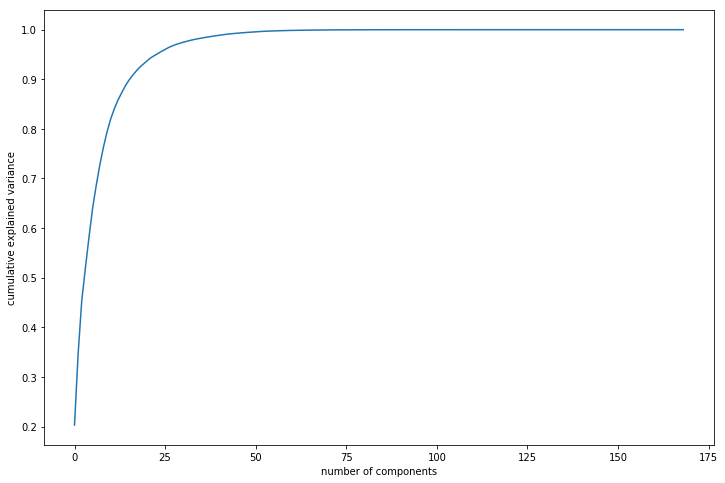

In [69]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_nrm.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [70]:
#Variance of each PC 
pca_nrm.explained_variance_ratio_[:10]

array([0.20298493, 0.14366388, 0.10703518, 0.06576584, 0.06234611,
       0.05870625, 0.04586773, 0.04139199, 0.03597854, 0.03084391])

# Business Understanding

## Logistic Regression

In [71]:
high_val_cost_lr = bal_churn_data.copy()

In [72]:
X = high_val_cost_lr.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = high_val_pca['churn']

In [73]:
x_log = pd.get_dummies(X,drop_first = True)

In [74]:
x_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14658 entries, 20535 to 50095
Columns: 175 entries, arpu_6 to fb_user_8_1.0
dtypes: float64(157), int32(6), uint8(12)
memory usage: 18.2 MB


In [75]:
#Splitting the data into train and test using train_test_split
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log,y, train_size=0.7,test_size=0.3,random_state=100)

In [76]:
x_train_sm = sm.add_constant(x_train_log)

lr = sm.GLM(y_train_log,x_train_sm).fit()
print (lr.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 10260
Model:                            GLM   Df Residuals:                     10113
Model Family:                Gaussian   Df Model:                           146
Link Function:               identity   Scale:              0.12932110659992838
Method:                          IRLS   Log-Likelihood:                 -3991.1
Date:                Sun, 26 Aug 2018   Deviance:                        1307.8
Time:                        23:57:04   Pearson chi2:                  1.31e+03
No. Iterations:                     2                                          
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8121      0.033     24.268      0.000       0.747       0.878
arpu

In [77]:
lr1 = LogisticRegression()

In [78]:
rfe = RFE(lr1, 10)

In [79]:
#rfe = rfe.fit(x_train_log, y_train_log)
#rfe_columns = x_train_log.columns[rfe.support_]

In [80]:
rfe_columns = ['total_rech_num_8', 'total_rech_data_8', 'monthly_2g_7', 'monthly_2g_8','sachet_2g_6', 'sachet_2g_8',
               'monthly_3g_8', 'sachet_3g_8','day_of_last_rech_8', 'fb_user_8_0.0']

In [81]:
lr1.fit(x_train_log[rfe_columns],y_train_log)
print (lr1.coef_)
print (lr1.intercept_)

[[-0.04978261 -0.67519883 -0.43501129 -1.10141295  0.12368432  0.32196668
  -0.50393794  0.60818538 -0.08047875  0.33187667]]
[2.70752669]


### Checking VIF

In [82]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [83]:
# vif_df = pd.get_dummies(high_val_cost_lr,drop_first = True)
# ref_col = vif_df[rfe_columns]
# vif_cal(input_data=ref_col, dependent_col="churn")

In [84]:
y_pred_log = lr1.predict(x_test_log[rfe_columns])
confusion_matrix(y_test_log, y_pred_log)
#y_pred_log

array([[1549,  653],
       [ 437, 1759]], dtype=int64)

In [85]:
print('Recall Score:', recall_score(y_test_log, y_pred_log))
print('Precision Score:', precision_score(y_test_log, y_pred_log))
print('Accuracy Score:', accuracy_score(y_test_log, y_pred_log))

Recall Score: 0.8010018214936248
Precision Score: 0.7292703150912107
Accuracy Score: 0.7521600727603456


#### EDA based on Logistic Regression

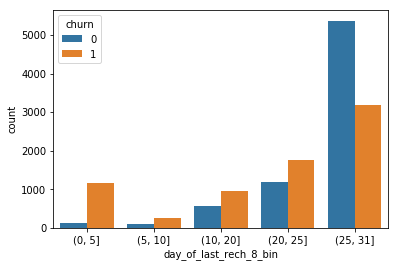

In [86]:
#Created bins on last recharge day of 8th month to get the insights 
bins = [0, 5, 10, 20,25,31]
high_val_cost_lr['day_of_last_rech_8_bin'] = pd.cut(high_val_cost_lr['day_of_last_rech_8'], bins)
sns.countplot(x='day_of_last_rech_8_bin',hue='churn',data=high_val_cost_lr)
plt.show()

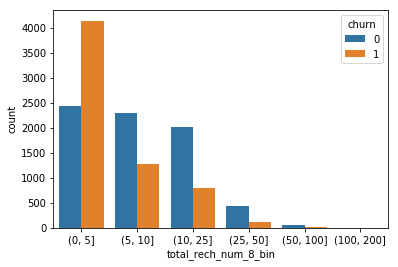

In [87]:
#Created bins on total recharge number of 8th month to get the insights 
bins = [0, 5, 10, 25, 50, 100,200]
high_val_cost_lr['total_rech_num_8_bin'] = pd.cut(high_val_cost_lr['total_rech_num_8'], bins)
sns.countplot(x='total_rech_num_8_bin',hue ='churn',data=high_val_cost_lr)
plt.show()

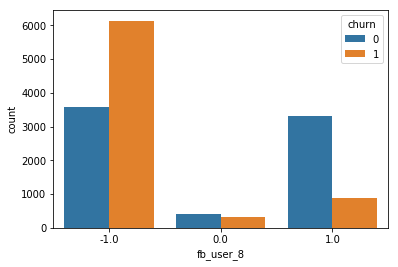

In [88]:
#Created bins on fb user of 8th month to get the insights 
sns.countplot(x='fb_user_8',hue ='churn',data=bal_churn_data)
plt.show()

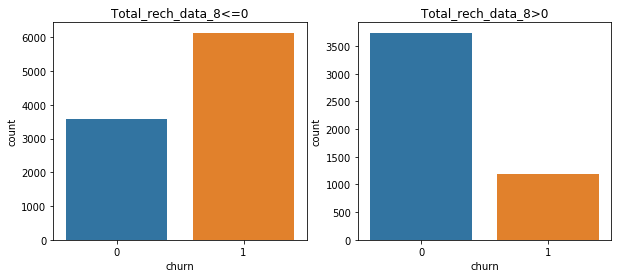

In [89]:
#Comparing total recharge data around 0 to get the insights 
data_8_0 = high_val_cost_lr[high_val_cost_lr['total_rech_data_8']<=0]
data_8_1 = high_val_cost_lr[high_val_cost_lr['total_rech_data_8']>0]
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x='churn',data=data_8_0)
plt.title('Total_rech_data_8<=0')
plt.subplot(122)
sns.countplot(x='churn',data=data_8_1)
plt.title('Total_rech_data_8>0')
plt.show()

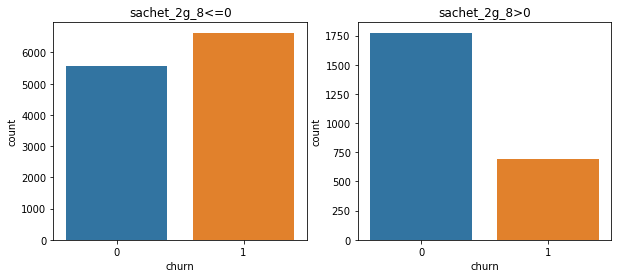

In [90]:
#Comparing total sachet 2g data around 0 to get the insights 
sachet_2g_8_0 = high_val_cost_lr[high_val_cost_lr['sachet_2g_8']<=0]
sachet_2g_8_1 = high_val_cost_lr[high_val_cost_lr['sachet_2g_8']>0]
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x='churn',data=sachet_2g_8_0)
plt.title('sachet_2g_8<=0')
plt.subplot(122)
sns.countplot(x='churn',data=sachet_2g_8_1)
plt.title('sachet_2g_8>0')
plt.show()

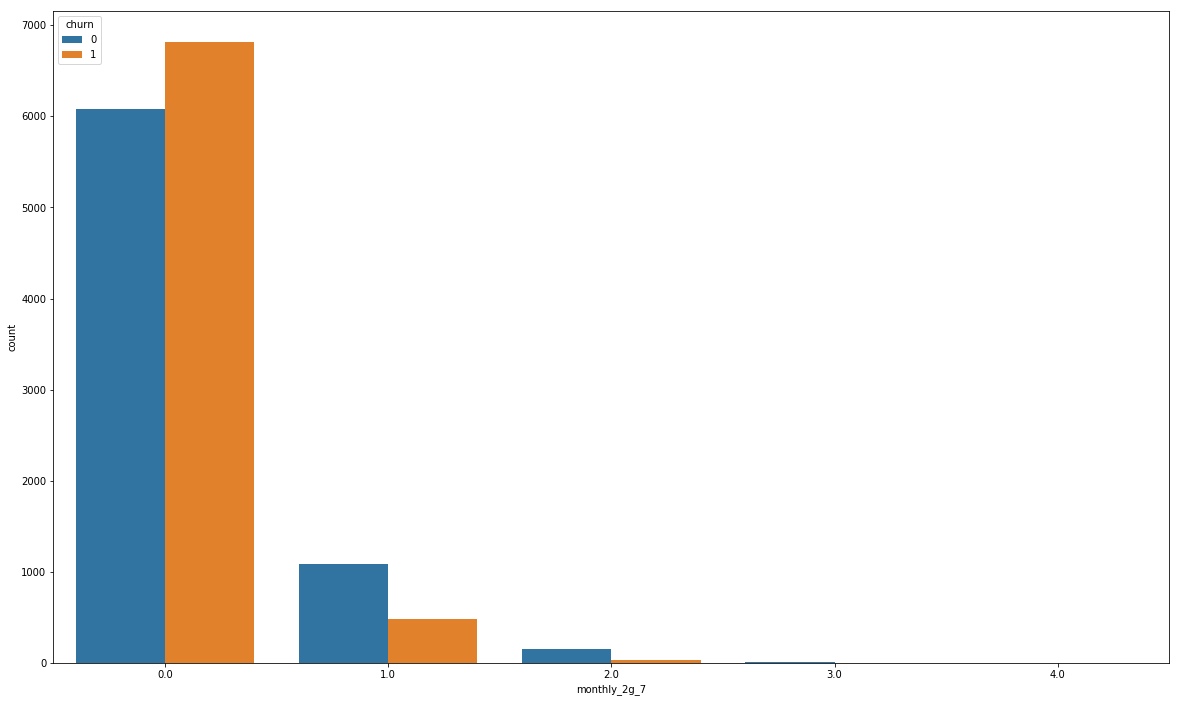

In [91]:
#Counting monthly 2g data for the month of 7 to draw instances
plt.figure(figsize=(20,12))
sns.countplot(x='monthly_2g_7',hue ='churn',data=bal_churn_data)
plt.show()

## Decision Tree

In [92]:
high_val_cost_dt = bal_churn_data.copy()

In [93]:
high_val_cost_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14658 entries, 20535 to 50095
Columns: 171 entries, mobile_number to day_of_last_rech_8
dtypes: float64(158), int32(6), int64(1), object(6)
memory usage: 18.9+ MB


In [94]:
# Putting feature variable to X
X = high_val_cost_dt.drop(['mobile_number','churn'],axis=1)

# Putting response variable to y
y = high_val_cost_dt['churn']

In [95]:
#Splitting the data into train and test using train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### taking max_depth as 5 for business understanding.

In [96]:
# Fitting the decision tree with default hyperparameters, apart from

dt_default = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_default.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [97]:
y_pred_dt = dt_default.predict(X_test_dt)

In [98]:
confusion_matrix(y_test_dt, y_pred_dt)

array([[1827,  375],
       [ 249, 1947]], dtype=int64)

In [99]:
#Metrics from the Desicion tree built
print('Recall Score:', recall_score(y_test_dt, y_pred_dt))
print('Precision Score:', precision_score(y_test_dt, y_pred_dt))
print('Accuracy Score:', accuracy_score(y_test_dt, y_pred_dt))

Recall Score: 0.8866120218579235
Precision Score: 0.838501291989664
Accuracy Score: 0.8581173260572987


In [100]:

# Putting features
features = list(X.columns[0:])

In [101]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [102]:
# # plotting tree with max_depth=3
# dot_data = StringIO()  
# export_graphviz(dt_default, out_file=dot_data,
#                 feature_names=features, filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# graph[0].write_pdf("churn_PCA_df.pdf")

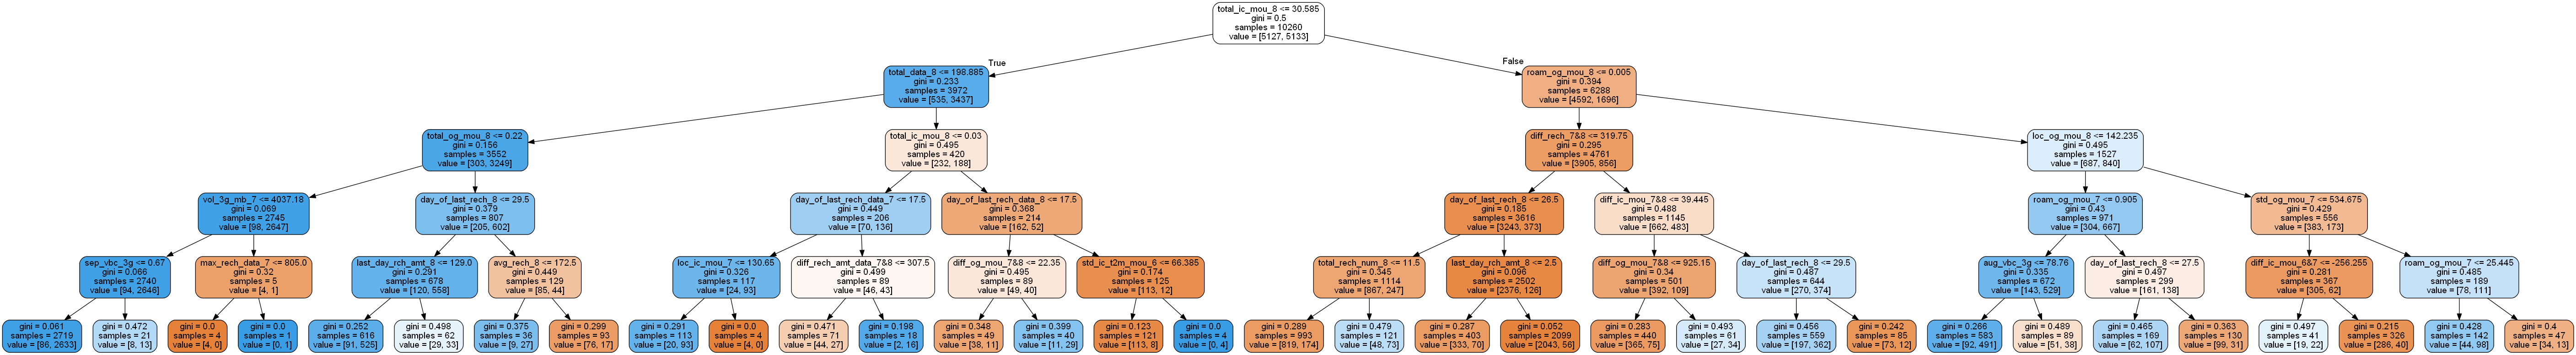

In [103]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

### EDA based on Decision Trees

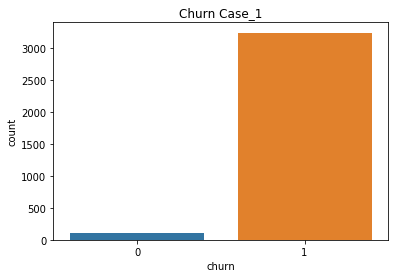

In [104]:
#Case1: Place these constrains on data: 1. total_ic_mou_8     <=  30.02
#                                       2. total_data_8       <=  35.018
#                                       3. total_og_mou_8     <=  0.22
#                                       4. vol_3g_mb_7        <=  3.5

churn_case1 = high_val_cost_dt[(high_val_cost_dt['total_ic_mou_8']<=30.02) & (high_val_cost_dt['total_data_8']<=35.015)]
churn_case1 = churn_case1[(churn_case1['total_og_mou_8']<=0.22)&(churn_case1['vol_3g_mb_7']<=0.22)]
sns.countplot(x='churn',data=churn_case1)
plt.title('Churn Case_1')
plt.show()

#### Above filtered data churn percentage is 96.74%.

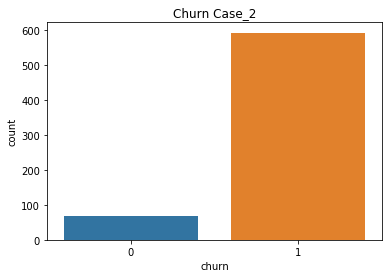

In [105]:
#Case2: Place these constrains on data: 1. total_ic_mou_8     <=  30.02
#                                       2. total_data_8       <=  35.018
#                                       3. total_og_mou_8     >   0.22
#                                       4. total_og_mou_8     <=  453.405
#                                       5. last_day_rch_amt_8 <=  3.5

churn_case2 = high_val_cost_dt[(high_val_cost_dt['total_ic_mou_8']<=30.02) & (high_val_cost_dt['total_data_8']<=35.018)]
churn_case2 = churn_case2[(churn_case2['total_og_mou_8']>0.22)&(churn_case2['total_og_mou_8']<=453.405) &(churn_case2['last_day_rch_amt_8']<=3.5)]
sns.countplot(x='churn',data=churn_case2)
plt.title('Churn Case_2')
plt.show()

#### Above filtered data churn percentage is 89.56%.

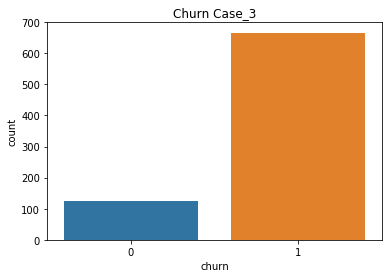

In [106]:
#Case3: Place these constrains on data: 1. total_ic_mou_8     >   30.02
#                                       2. roam_og_mou_8      >   0.005
#                                       3. loc_ic_mou_8       <=  191.36
#                                       4. roam_og_mou_7      <=  1.005
#                                       5. loc_og_t2f_mou_6   <=  0.39


churn_case3 = high_val_cost_dt[(high_val_cost_dt['total_ic_mou_8']>30.02)&(high_val_cost_dt['roam_og_mou_8']>0.005)]
churn_case3 = churn_case3[(churn_case3['loc_ic_mou_8']<=191.36)&(churn_case3['roam_og_mou_7']<=1.005)&(churn_case3['loc_og_t2f_mou_6']<=0.39)]
sns.countplot(x='churn',data=churn_case3)
plt.title('Churn Case_3')
plt.show()

#### Above filtered data churn percentage is 84.09%.

### Decision Tree for Modelling

In [107]:
# Fitting the decision tree with default hyperparameters, apart from

model_dt_default = DecisionTreeClassifier(max_depth=25,random_state=42)
model_dt_default.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [108]:
y_pred_dt_model = model_dt_default.predict(X_test_dt)

In [109]:
confusion_matrix(y_test_dt, y_pred_dt_model)

array([[1950,  252],
       [  71, 2125]], dtype=int64)

In [110]:
#Metrics from the Desicion tree built
print('Recall Score:', recall_score(y_test_dt, y_pred_dt_model))
print('Precision Score:', precision_score(y_test_dt, y_pred_dt_model))
print('Accuracy Score:', accuracy_score(y_test_dt, y_pred_dt_model))

Recall Score: 0.9676684881602914
Precision Score: 0.8939840134623475
Accuracy Score: 0.9265575261482492


## Model building with PCA

In [111]:
#Splitting the data into train and test using train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_PCA, y_pca, train_size=0.7,test_size=0.3,random_state=100)

In [112]:
#Doing IncrementalPCA by taking 32 components which given more than 90% of data
pca_final = IncrementalPCA(n_components=32)

In [113]:
# Converting data to Principle components
df_train_pca = pca_final.fit_transform(X_train_pca)
df_test_pca = pca_final.transform(X_test_pca)

### Logistic Regression

In [114]:
#Defining different variables for Logistic PCA
X_train_pca_log = X_train_pca
X_test_pca_log = X_test_pca

In [115]:
#Fitting the PCA data to LogisticRegression
log_pca = LogisticRegression(random_state=42)
log_pca.fit(X_train_pca_log, y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
#Predecting the output values
y_pred_pca_log = log_pca.predict(X_test_pca)

In [117]:
y_pred_pca_log

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [118]:
#confusion matrix
confusion_matrix(y_test_pca, y_pred_pca_log)

array([[1883,  319],
       [ 342, 1854]], dtype=int64)

In [119]:
#Model metrics
print('Recall Score:', recall_score(y_test_pca, y_pred_pca_log))
print('Precision Score:', precision_score(y_test_pca, y_pred_pca_log))
print('Accuracy Score:', accuracy_score(y_test_pca, y_pred_pca_log))

Recall Score: 0.8442622950819673
Precision Score: 0.8531983433041878
Accuracy Score: 0.8497044110959527


#### Comparing logistic business metric with and without PCA
Logistic without PCA Recall Score: 0.8010018214936248 

Logistic with PCA Recall Score: 0.8442622950819673

### hyper parameter tuning

In [120]:
params = {'C': [0.1, 80, 90, 100, 110, 120, 500, 1000], 'penalty':['l1', 'l2'] }
log_tune = LogisticRegression(random_state=42)
folds = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(estimator=log_tune, param_grid=params, scoring='recall', cv=folds, verbose=1, return_train_score=True)

model_log_tuned_cv = clf.fit(X_train_pca_log, y_train_pca)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 14.5min finished


In [121]:
#Finding best parameters from best_estimator_
print('Best Penalty:', model_log_tuned_cv.best_estimator_.get_params()['penalty'])
print('Best C:', model_log_tuned_cv.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 80


In [122]:
#Fitting the model 
y_pred_log_cv = model_log_tuned_cv.predict(X_test_pca)

In [123]:
#Confusion Matrix
confusion_matrix(y_test_pca,y_pred_log_cv)

array([[1868,  334],
       [ 320, 1876]], dtype=int64)

In [124]:
#Model metrics
recall_score(y_test_pca, y_pred_log_cv)
print('Recall Score:', recall_score(y_test_pca, y_pred_log_cv))
print('Precision Score:', precision_score(y_test_pca, y_pred_log_cv))
print('Accuracy Score:', accuracy_score(y_test_pca, y_pred_log_cv))

Recall Score: 0.8542805100182149
Precision Score: 0.848868778280543
Accuracy Score: 0.8512960436562074


#### Comparing logistic business metric with and without PCA
Logistic without PCA Recall Score: 0.8010018214936248 

Logistic with PCA Recall Score: 0.8442622950819673

Logistic After hyper parameter tuning Recall Score: 0.8542805100182149

### SVM

#### Since SVM taking huge time code has been commented out by mentioning output as comment

In [125]:
#Model building using SVM
model_SVM_PCA = SVC(C=1, random_state=42, kernel='poly')

In [126]:
#Fit the train data
#model_SVM_PCA.fit(df_train_pca, y_train_pca)

#Output of fit
#SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False)

In [127]:
# predict output values
#y_pred_svm = model_SVM_PCA.predict(df_test_pca)

In [128]:
#Confusion Matrix
#confusion_matrix(y_test_pca,y_pred_svm)

#Confusion matrix output
#array([[2214, 0], 
#       [ 264, 1950]], dtype=int64)

In [129]:
#Model Metrics
# accuracy
# print("Accuracy Score:", accuracy_score(y_test_pca, y_pred_svm))

# # precision
# print("Precision Score:", precision_score(y_test_pca, y_pred_svm))

# # recall/sensitivity
# print("Recall Score:", recall_score(y_test_pca, y_pred_svm))

#Metrics Output 
#Accuracy Score: 0.940379403794038 
#Precision Score: 1.0 
#Recall Score: 0.8807588075880759

### Hyper patameter tuning for SVM

In [130]:
#Tuning hyper parameter C of SVM
params = {"C": [0.1, 1, 10, 100, 1000]}
model_SVM_PCA_tuned = SVC()
folds = KFold(n_splits=5, random_state=42)
model_svm_cv = GridSearchCV(estimator=model_SVM_PCA_tuned, param_grid=params, scoring='recall', cv=folds, verbose=1, return_train_score=True)

In [131]:
#fit the training data on SVM
#model_svm_cv.fit(df_train_pca, y_train_pca)

#Output for fit
#Fitting 5 folds for each of 5 candidates, totalling 25 fits 
#[Parallel(n_jobs=1)]: Done 25 out of 25 | elapsed: 6.7min finished 

#GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False), error_score='raise', estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False), fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs', refit=True, return_train_score=True, scoring='accuracy', verbose=1

In [132]:
#Predicting on test data
#y_pred_svm_tuned = model_svm_cv.predict(df_test_pca)

In [133]:
#confusion matrix
#confusion_matrix(y_test_pca,y_pred_svm_tuned)

#Confusion matrix Output
#array([[2214, 0], 
#       [ 264, 1950]], dtype=int64)

In [134]:
# print('Recall Score:', recall_score(y_test_pca,y_pred_svm_tuned))
# print('Precision Score:', precision_score(y_test_pca,y_pred_svm_tuned))
# print('Accuracy Score:', accuracy_score(y_test_pca,y_pred_svm_tuned))

#### Comparing SVM business metrics with and without hyper parameter tuning on PCA data
SVM without Tuning Recall Score:  0.8807588075880759

SVM After hyper parameter tuning Recall Score: 0.8807588075880759

### Decision Tree

In [135]:
#Building a model using Decision Tree
# Fitting the decision tree with max_depth equal to 10 on PCA data
model_dt_pca = DecisionTreeClassifier(max_depth=10,random_state=42)
model_dt_pca.fit(df_train_pca, y_train_pca)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [136]:
#Predicting the output variable 
y_pred_dt_pca = model_dt_pca.predict(df_test_pca)

In [137]:
#Confusion Matrix
confusion_matrix(y_test_pca, y_pred_dt_pca)

array([[1792,  410],
       [ 226, 1970]], dtype=int64)

In [138]:
#Model Metrics
print('Recall Score:', recall_score(y_test_pca, y_pred_dt_pca))
print('Precision Score:', precision_score(y_test_pca, y_pred_dt_pca))
print('Accuracy Score:', accuracy_score(y_test_pca, y_pred_dt_pca))

Recall Score: 0.8970856102003643
Precision Score: 0.8277310924369747
Accuracy Score: 0.8553888130968622


#### Comparing Decision Tree business metric with and without PCA
Decision Tree without PCA Recall Score: 0.9658469945355191 

Decision Tree with PCA Recall Score: 0.8970856102003643

## Hyper parameters tuning for DT

In [139]:
#tuning hyper parameters 
params = {
    'max_depth': range(15,50,5),
    'min_samples_leaf': range(1,11,2),
    'min_samples_split': range(2,10,2),
    'criterion': ['entropy','gini']
}

In [140]:
#Building model for hyper parameter tuning
model_tuned_dt = DecisionTreeClassifier(random_state=42)

In [141]:
model_tuned_dt_cv = GridSearchCV(estimator=model_tuned_dt, param_grid=params,cv=folds, scoring='recall', verbose=1,return_train_score=True)
model_tuned_dt_cv.fit(df_train_pca, y_train_pca)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:  9.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(15, 50, 5), 'min_samples_leaf': range(1, 11, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [142]:
#Checking best parameters using  best_estimator_
model_tuned_dt_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [143]:
#Predicting on test data
y_pred_dt_tuned = model_tuned_dt_cv.predict(df_test_pca)

In [144]:
#Confusion Matrix
confusion_matrix(y_test_pca, y_pred_dt_tuned)

array([[1845,  357],
       [ 109, 2087]], dtype=int64)

In [145]:
#Model Metrics
print('Recall Score:', recall_score(y_test_pca, y_pred_dt_tuned))
print('Precision Score:', precision_score(y_test_pca, y_pred_dt_tuned))
print('Accuracy Score:', accuracy_score(y_test_pca, y_pred_dt_tuned))

Recall Score: 0.9503642987249544
Precision Score: 0.8539279869067103
Accuracy Score: 0.8940427467030468


#### Comparing Decision Tree business metric with and without PCA after hyper parameter tuning
Decision Tree without PCA Recall Score: 0.9658469945355191 

Decision Tree with PCA Recall Score: 0.8970856102003643

Decision Tree After hyper parameter tuning Recall Score: 0.9503642987249544

### Random Forest

In [146]:
# Building the random forest with default parameters.
model_rfc_pca = RandomForestClassifier(max_depth=10,random_state=100)

In [147]:
# fit
model_rfc_pca.fit(df_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [148]:
# Making predictions
y_pred_rf = model_rfc_pca.predict(df_test_pca)

In [149]:
#Confusion Matrix
confusion_matrix(y_test_pca, y_pred_rf)

array([[1925,  277],
       [ 229, 1967]], dtype=int64)

In [150]:
#Model Metrics
print('Recall Score:', recall_score(y_test_pca, y_pred_rf))
print('Precision Score:', precision_score(y_test_pca, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test_pca, y_pred_rf))

Recall Score: 0.8957194899817851
Precision Score: 0.8765597147950089
Accuracy Score: 0.8849477035015917


### Hyper parameter tuning for Random Forest

In [151]:
#Hyper parameter tuning
params_rf = {
    'max_depth': range(5,50,5),
    #'min_samples_leaf': range(5,30,5),
    #'min_samples_split': range(5,30,5),
    'criterion': ['entropy','gini']
}

In [152]:
model_tuned_rf = RandomForestClassifier(random_state=42)

In [153]:
model_tuned_rf_cv = GridSearchCV(estimator=model_tuned_rf, param_grid=params_rf,cv=folds, scoring='recall', verbose=1,return_train_score=True)
model_tuned_rf_cv.fit(df_train_pca, y_train_pca)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   39.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 50, 5), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [154]:
#Checking best parameters using  best_estimator_
model_tuned_rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [155]:
#Predicting on test data
y_pred_rf_tuned = model_tuned_rf_cv.predict(df_test_pca)

In [156]:
#confusion matrix
confusion_matrix(y_test_pca, y_pred_rf_tuned)

array([[1944,  258],
       [ 115, 2081]], dtype=int64)

In [157]:
#Model Metrics
print('Recall Score:', recall_score(y_test_pca, y_pred_rf_tuned))
print('Precision Score:', precision_score(y_test_pca, y_pred_rf_tuned))
print('Accuracy Score:', accuracy_score(y_test_pca, y_pred_rf_tuned))

Recall Score: 0.947632058287796
Precision Score: 0.8896964514749893
Accuracy Score: 0.9151887221464302


#### Comparing Random Forest business metric with and without hyper parameter tuning
Random Forest without hyper parameter tuning Recall Score: 0.8957194899817851 

Random Forest with hyper parameter tuning Recall Score: 0.947632058287796

## XG Boosting

In [158]:
#Model building using XG Boosting 
xgb = XGBClassifier(max_depth = 20, random_state=42)

In [159]:
#Fitting on train data
xgb.fit(df_train_pca, y_train_pca)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [160]:
#Predicting on test data
y_pred_xgb = xgb.predict(df_test_pca)

In [161]:
#Confusion Matrix
confusion_matrix(y_test_pca, y_pred_xgb)

array([[1995,  207],
       [  77, 2119]], dtype=int64)

In [162]:
#Model Metrics
# accuracy
print("Accuracy Score:", accuracy_score(y_test_pca, y_pred_xgb))

# precision
print("Precision Score:", precision_score(y_test_pca, y_pred_xgb))

# recall/sensitivity
print("Recall Score:", recall_score(y_test_pca, y_pred_xgb))

Accuracy Score: 0.935425193269668
Precision Score: 0.911006018916595
Recall Score: 0.964936247723133


## Hyper parameter tuning for XG Boosting

In [163]:
#Hyper parameter tuning for XG Boosting
params_xgb = {
    'max_depth': range(5,50,5),
    #'gamma': [0.01, 0.1,0.3,0.5, 0.6, 0.7],
    #'learning_rate': [0.01, 0.1,0.3,0.5, 0.6, 0.7]
}

In [164]:
model_tuned_xgb = XGBClassifier(random_state=42)

In [165]:
model_tuned_xgb_cv = GridSearchCV(estimator=model_tuned_xgb, param_grid=params_xgb,cv=folds, scoring='recall', verbose=1,return_train_score=True)
model_tuned_xgb_cv.fit(df_train_pca, y_train_pca)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  7.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 50, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='recall', verbose=1)

In [166]:
#Checking best parameters using  best_estimator_
model_tuned_xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [167]:
#Predicting on test data
y_pred_xgb_tuned = model_tuned_xgb_cv.predict(df_test_pca)

In [168]:
#confusion matrix
confusion_matrix(y_test_pca, y_pred_xgb_tuned)

array([[1999,  203],
       [  74, 2122]], dtype=int64)

In [169]:
#Model Metrics
# accuracy
print("Accuracy Score:", accuracy_score(y_test_pca, y_pred_xgb_tuned))

# precision
print("Precision Score:", precision_score(y_test_pca, y_pred_xgb_tuned))

# recall/sensitivity
print("Recall Score:", recall_score(y_test_pca, y_pred_xgb_tuned))

Accuracy Score: 0.9370168258299227
Precision Score: 0.9126881720430108
Recall Score: 0.9663023679417122


#### Comparing  XG Boosting business metric with and without hyper parameter tuning
XG Boosting without hyper parameter tuning Recall Score: 0.964936247723133

XG Boosting with hyper parameter tuning Recall Score: 0.9685792349726776

### ---------------------------------------------**********************---------------------------------------------------

# Business Objectives from the analysis

Logistic:

1) In the 8th month if the customer day of the last recharge date is with in 5th of that month then there is more chances of churn with the confidence of 90%

	if it is after 25th then less chances of churn with confidence of 68%
    
2) If number of times recharged in the 8th month range is 0-5 then more chances of churn with the confidence of 63%


3) If customer is fb_user in 8th month then less chances of churn with the confidence of 63%


4) If the total recharge data in 8th month is greater than 0 then less chances of churn with the confidence of 75%


5) If sachet 2g data is greater than 0 then less chances of churn with the confidence of 72%

Decision Trees:

If below particular case conditions are satisfied then corresponding churn percentage can be found


1) Case 1: With churn percentage of 96.74%

	total incoming mins of usage in 8th month <= 30.02
    
	total data used in 8th month <= 35.018
    
	total outgoing mins of usage in 8th month <= 0.22
    
	3g data volume of the 7th month <= 3.5
    
    

2) Case 2: With churn percentage of 89.56%

	total incoming mins of usage in 8th month <= 30.02
    
	total data used in 8th month <= 35.018
    
	total outgoing mins of usage in 8th month in the range of (0.22, 453.405)
    
	last recharge amount in 8th month <= 3.5
    
    
3) Case 3: With churn percentage of 84.09%

	total incoming mins of usage in 8th month > 30.02    
    
	outgoing roaming mins of usage in 8th month > 0.005   
    
	local incoming mins of usage in 8th month <= 191.36  
    
	outgoing roaming mins of usage in 8th month <= 1.005   
    
	local same network outgoing mins of usage in 6th month <= 0.39



# Model Selection

Main business objective metric is Recall which mainly deals with churn.

A reasonable number and variety of different models are attempted and can conclude that Tree based algorithm giving good results for this case study

Decision tree giving Recall score of 96.7% without any PCA and hyper parameter tuning

The best suggested model according to the recall score is XGBoost which is having almost score of 96.8%

But as per computation and business requirements even Decision Tree also does better